## Analyzing subscriber and customer Citi Bike data

### Goal 1: import subscriber and customer data

In [159]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn')

In [92]:
# # Disable the orca response timeout.
# import plotly.io._orca
# import retrying
# unwrapped = plotly.io._orca.request_image_with_retrying.__wrapped__
# wrapped = retrying.retry(wait_random_min=1000)(unwrapped)
# plotly.io._orca.request_image_with_retrying = wrapped

In [93]:
# import 2019 trip data
df_2019_01 = pd.read_csv('data/201901-citibike-tripdata.csv.zip')
df_2019_02 = pd.read_csv('data/201902-citibike-tripdata.csv.zip')
df_2019_03 = pd.read_csv('data/201903-citibike-tripdata.csv.zip')
df_2019_04 = pd.read_csv('data/201904-citibike-tripdata.csv.zip')
df_2019_05 = pd.read_csv('data/201905-citibike-tripdata.csv.zip')
df_2019_06 = pd.read_csv('data/201906-citibike-tripdata.csv.zip')
df_2019_07 = pd.read_csv('data/201907-citibike-tripdata.csv.zip')
df_2019_08 = pd.read_csv('data/201908-citibike-tripdata.csv.zip')

In [94]:
# import 2020 trip data
df_2020_01 = pd.read_csv('data/202001-citibike-tripdata.csv.zip')
df_2020_02 = pd.read_csv('data/202002-citibike-tripdata.csv.zip')
df_2020_03 = pd.read_csv('data/202003-citibike-tripdata.csv.zip')
df_2020_04 = pd.read_csv('data/202004-citibike-tripdata.csv.zip')
df_2020_05 = pd.read_csv('data/202005-citibike-tripdata.csv.zip')
df_2020_06 = pd.read_csv('data/202006-citibike-tripdata.csv.zip')
df_2020_07 = pd.read_csv('data/202007-citibike-tripdata.csv.zip')
df_2020_08 = pd.read_csv('data/202008-citibike-tripdata.csv.zip')

In [95]:
# concatenate data by year
df_2019 = pd.concat([df_2019_01, df_2019_02, df_2019_03, df_2019_04, 
                     df_2019_05, df_2019_06, df_2019_07, df_2019_08])
df_2020 = pd.concat([df_2020_01, df_2020_02, df_2020_03, df_2020_04, 
                     df_2020_05, df_2020_06, df_2020_07, df_2020_08])

In [96]:
# add column denoting year
df_2019['year'] = "2019"
df_2020['year'] = "2020"

In [97]:
# add column for user age
df_2019['age'] = 2019 - df_2019['birth year']
df_2020['age'] = 2020 - df_2020['birth year']

In [98]:
df = pd.concat([df_2019, df_2020])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,year,age
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1,2019,48
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1,2019,55
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1,2019,32
3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1,2019,29
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1,2019,40


### Goal 2: find proportion of subscribers and customers

In [83]:
# grouped = df.groupby(["year", "usertype"]).size().reset_index(name="count")
# grouped

In [84]:
# print("Breakdown of 2019 users:")
# print(df['usertype'][df['year'] == '2019'].value_counts(normalize=True) * 100)
# print("\n")
# print("Breakdown of 2020 users:")
# print(df['usertype'][df['year'] == '2020'].value_counts(normalize=True) * 100)

In [85]:
grouped_user = df.groupby(['year', 'usertype']).agg({'tripduration': 'count'})
perc_user = grouped_user.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
perc_user = perc_user.reset_index()
perc_user.columns = ['year', 'usertype', 'percentage']
perc_user

,year,usertype,percentage
0,2019,Customer,14.078468
1,2019,Subscriber,85.921532
2,2020,Customer,23.368617
3,2020,Subscriber,76.631383


In [87]:
# fig = px.bar(perc_user, x="year", y="percentage", color="usertype", 
#              color_discrete_sequence=['rgb(35,53,113)', 'rgb(0,161,225)'])
# fig.update_xaxes(type='category')
# fig.write_image("images/fig1.png")
# fig.show()

Here, we see that

### Goal 3: find breakdown of age and gender for users

In [ ]:
# print average age of users for each gender
print(df.groupby(['year','usertype'])['age'].mean())

In [ ]:
# view proportion of genders
print("Breakdown of 2019 users:")
print(df['gender'][df['year'] == '2019'].value_counts(normalize=True) * 100)
print("\n")
print("Breakdown of 2020 users:")
print(df['gender'][df['year'] == '2020'].value_counts(normalize=True) * 100)

In [221]:
small = df[df['gender'] != 0]
smaller = small[['gender', 'year', 'age', 'usertype']]
smaller['Gender'] = np.where(smaller['gender'] == 1, 'Male', 'Female')
smaller.head()

/Users/laurentso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,gender,year,age,usertype,Gender
0,1,2019,48,Subscriber,Male
1,1,2019,55,Subscriber,Male
2,1,2019,32,Subscriber,Male
3,1,2019,29,Subscriber,Male
4,1,2019,40,Subscriber,Male


In [166]:
grouped_user = smaller.groupby(['year', 'Gender']).agg({'age': 'count'})
perc_user = grouped_user.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
perc_user = perc_user.reset_index()
perc_user.columns = ['year', 'Gender', 'percentage']
perc_user

,year,Gender,percentage
0,2019,Female,25.858129
1,2019,Male,74.141871
2,2020,Female,31.641039
3,2020,Male,68.358961


In [167]:
# plot percentage of genders
# fig = px.bar(perc_user, x="year", y="percentage", color="Gender", 
#               color_discrete_sequence=['rgb(35,53,113)', 'rgb(0,161,225)'])
# fig.update_xaxes(type='category')
# fig.write_image("images/fig2.png")
# fig.show()


KeyboardInterrupt



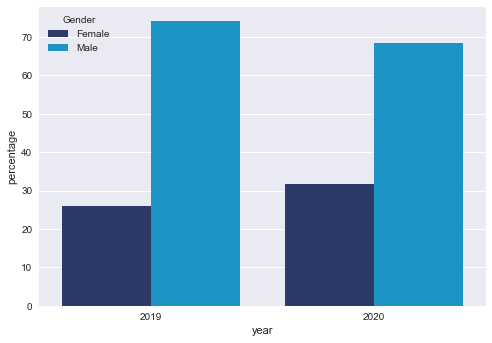

In [172]:
# plot percentage of genders
flatui = ["#233571", "#00a1e1"]
bar = sns.barplot(x="year", y="percentage", hue='Gender', data=perc_user, 
                  ci=None, palette=sns.set_palette(flatui))
fig = bar.get_figure()
fig.savefig("images/fig2.png")

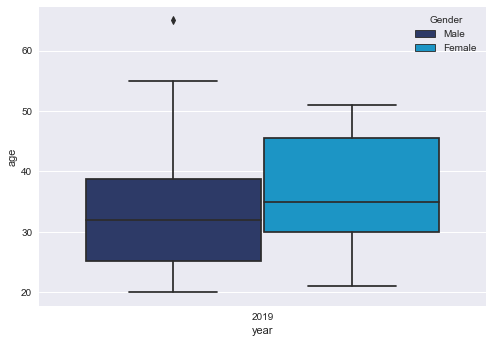

In [158]:
box = sns.boxplot(x="year", y="age", hue="Gender", data=smaller, palette=sns.set_palette(flatui))
fig = box.get_figure()
fig.savefig("images/fig3.png")

In [ ]:
# plot average age by usertype
box = sns.boxplot(x="year", y="age", hue="usertype", data=smaller, palette=sns.set_palette(flatui))
fig = box.get_figure()
fig.savefig("images/fig4.png")

In [ ]:
# plot percentage of genders
flatui = ["#233571", "#00a1e1"]
bar = sns.barplot(x="year", y="percentage", hue='usertype', data=smaller, 
                  ci=None, palette=sns.set_palette(flatui))
fig = bar.get_figure()
fig.savefig("images/fig2.png")

In [228]:
smaller_c = smaller[smaller['usertype'] == 'Customer']
smaller_s = smaller[smaller['usertype'] == 'Subscriber']

grouped_user_c = smaller_c.groupby(['year', 'Gender', 'usertype']).agg({'age': 'count'})
perc_user_c = grouped_user_c.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
perc_user_c = perc_user_c.reset_index()
perc_user_c.columns = ['year', 'Gender', 'usertype', 'percentage']
perc_user_c

grouped_user_s = smaller_s.groupby(['year', 'Gender', 'usertype']).agg({'age': 'count'})
perc_user_s = grouped_user_s.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
perc_user_s = perc_user_s.reset_index()
perc_user_s.columns = ['year', 'Gender', 'usertype', 'percentage']
perc_user_s

perc_user = pd.concat([perc_user_c, perc_user_s])

perc_user.head()

,year,Gender,usertype,percentage
0,2019,Female,Customer,36.401845
1,2019,Male,Customer,63.598155
2,2020,Female,Customer,41.580966
3,2020,Male,Customer,58.419034
0,2019,Female,Subscriber,24.887183


In [229]:
smallest = perc_user[perc_user['Gender'] == 'Male']
smallest

,year,Gender,usertype,percentage
1,2019,Male,Customer,63.598155
3,2020,Male,Customer,58.419034
1,2019,Male,Subscriber,75.112817
3,2020,Male,Subscriber,70.173587


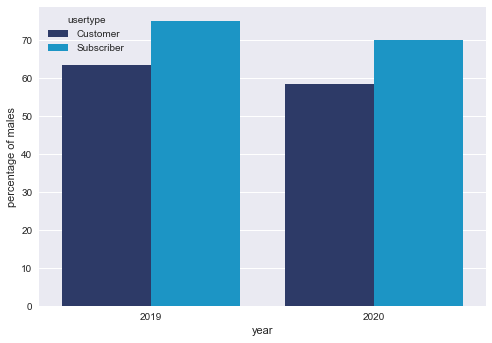

In [232]:
# plot percentage of genders
flatui = ["#233571", "#00a1e1"]
bar = sns.barplot(x="year", y="percentage", hue='usertype', data=smallest, 
                  ci=None, palette=sns.set_palette(flatui))
plt.ylabel("percentage of males")
fig = bar.get_figure()
fig.savefig("images/fig5.png")